In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Simple Regression for Wine Quality Prediction
Solidware Assignment for 2021 Summer Internship
- assignee: Kyuhyung Choi ([choigww@gmail.com](choigww@gmail.com))

```
Problem name: Wine
URL: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
Dataset: Red
Target variable: quality
Problem type: regression
Data format: semicolon-separated table
Missing values: None
```

<br>

## Attribute Information:
For more information, read [Cortez et al., 2009].

<br>

### Input variables (based on physicochemical tests):
변수 의미 출처: https://wikidocs.net/44386

feature|meaning|description
-|-|-
fixed acidity|고정산|와인의 산도를 제어
volatile acidity|휘발산|와인의 향과 연관
citric acid|구연산|와인의 신선함을 올림
residual sugar|잔여 당분|와인의 단 맛 올림
chlorides|염화물|와인의 짠 맛의 원인
free sulfur dioxide|황 화합물|와인을 오래 보관하게 함
total sulfur dioxide|황 화합물|와인을 오래 보관하게 함
density|밀도|와인의 무게감을 나타냄
pH|산성도|와인의 신 맛의 정도
sulphates|황 화합물|와인을 오래 보관하게 함
alcohol|알코올|와인의 단 맛과 무게감에 영향

<br>

#### Output variable (based on sensory data): 
12. quality (score between 0 and 10), 와인 품질

<br>

#### Relevant Papers:
```
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. 
```
- Available at: [Web Link](http://dx.doi.org/10.1016/j.dss.2009.05.016)
    - https://www.scinapse.io/papers/2103459159#fullText

In [70]:
# load data
red = pd.read_csv('./data/winequality-red.csv', sep=';')

In [3]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
# check data shape
print(red.shape)

(1599, 12)


In [7]:
# check nulls
print(red.isnull().sum().sum() == 0)

True


In [71]:
# check duplicates
red[red.duplicated(keep='first')]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [72]:
# 중복 데이터 대부분은 target 5, 6에 해당하는 샘플
red[red.duplicated(keep='first')]['quality'].value_counts()

5    104
6    103
7     32
8      1
Name: quality, dtype: int64

In [16]:
# drop duplicates and reset index
red = red.drop_duplicates(keep='last', ignore_index=True)

In [17]:
print(red.shape)
red.head(10)

(1359, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.8              0.88         0.00             2.6      0.098   
1            7.8              0.76         0.04             2.3      0.092   
2           11.2              0.28         0.56             1.9      0.075   
3            7.4              0.70         0.00             1.9      0.076   
4            7.4              0.66         0.00             1.8      0.075   
5            7.9              0.60         0.06             1.6      0.069   
6            7.3              0.65         0.00             1.2      0.065   
7            7.8              0.58         0.02             2.0      0.073   
8            6.7              0.58         0.08             1.8      0.097   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 25.0                  67.0   0.9968  3.20       0.68   
1                 15.0                  54.0   0.9970  3.26       0.65   
2                 17.0                  60.0   0.9980  3.16       0.58   
3                 11.0                  34.0   0.9978  3.51       0.56   
4                 13.0                  40.0   0.9978  3.51       0.56   
5                 15.0                  59.0   0.9964  3.30       0.46   
6                 15.0                  21.0   0.9946  3.39       0.47   
7                  9.0                  18.0   0.9968  3.36       0.57   
8                 15.0                  65.0   0.9959  3.28       0.54   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.8        5  
1      9.8        5  
2      9.8        6  
3      9.4        5  
4      9.4        5  
5      9.4        5  
6     10.0        7  
7      9.5        7  
8      9.2        5  
9     10.5        5

### Sample Size by Label
- 전체적으로 정규분포의 형태를 나타내고 있음
- 특정 target(5,6,7)에 샘플이 집중
    - 교차검증 과정에서 각 Label별 샘플이 골고루 나눠지도록 조치 필요
    - 그러나 target(4, 8, 3)의 경우 샘플 숫자가 너무 적어서 제대로 된 학습이 안될 가능성 높음

In [19]:
red['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [18]:
fig = px.histogram(red, x='quality')
fig.show()

### 데이터 설명변수 별 분포 시각화
- total dataset
- train set from train_test_split()
- test set from train_test_split()

In [20]:
def draw_feature_dist(df):
    plt.figure(figsize=(12,12))
    sns.set_palette("bright")
    for i in range(1,13):
        plt.subplot(3,4,i)
        sns.histplot(df.iloc[:,i-1],
                        kde=True,
                    palette='viridis')
    plt.tight_layout()
    plt.show()

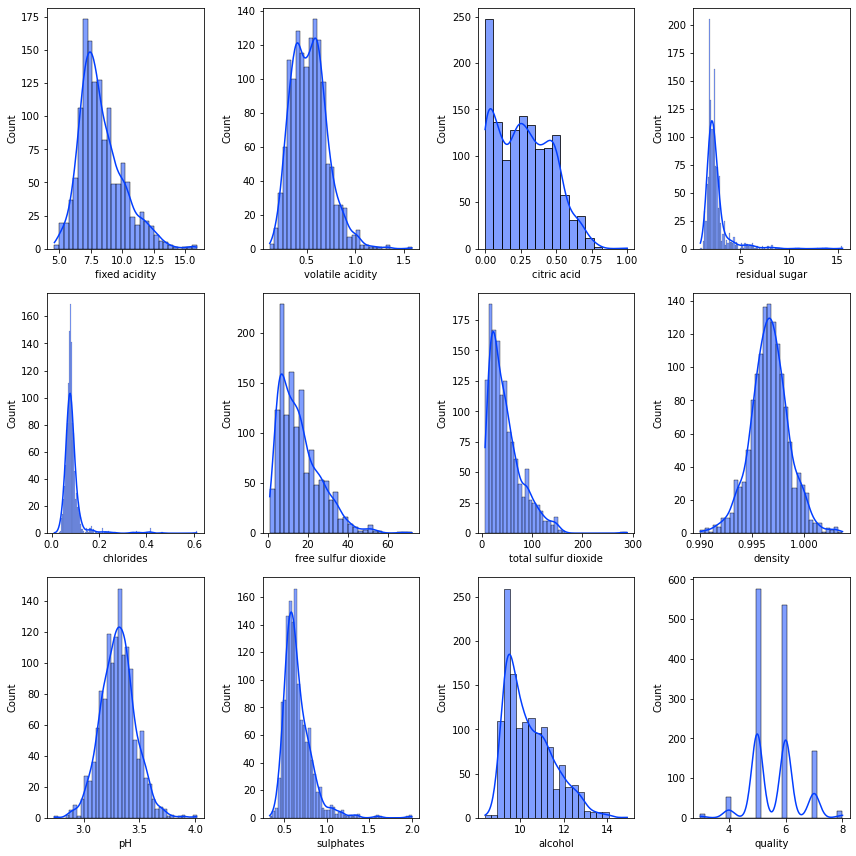

In [21]:
draw_feature_dist(red)

### Data Split (stratified) 분포 시각화
- 트레인 셋과 테스트 셋의 분포가 유사하게 나타남

In [22]:
X = red.drop('quality',axis=1)
y = red['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=2021)

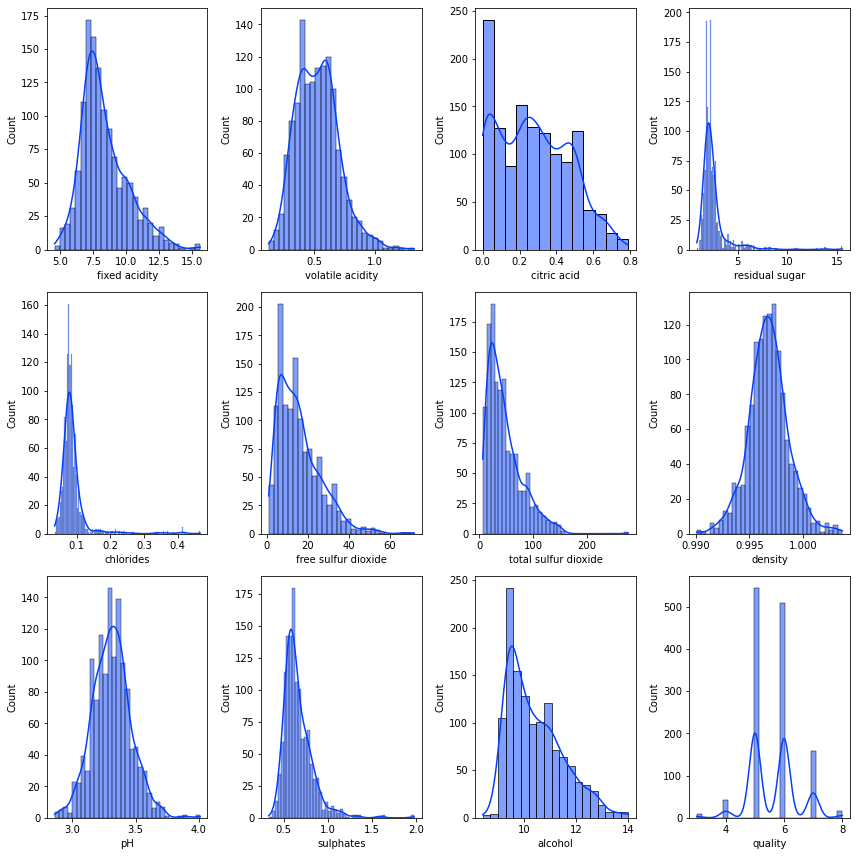

In [61]:
draw_feature_dist(pd.concat([X_train, y_train], axis=1))

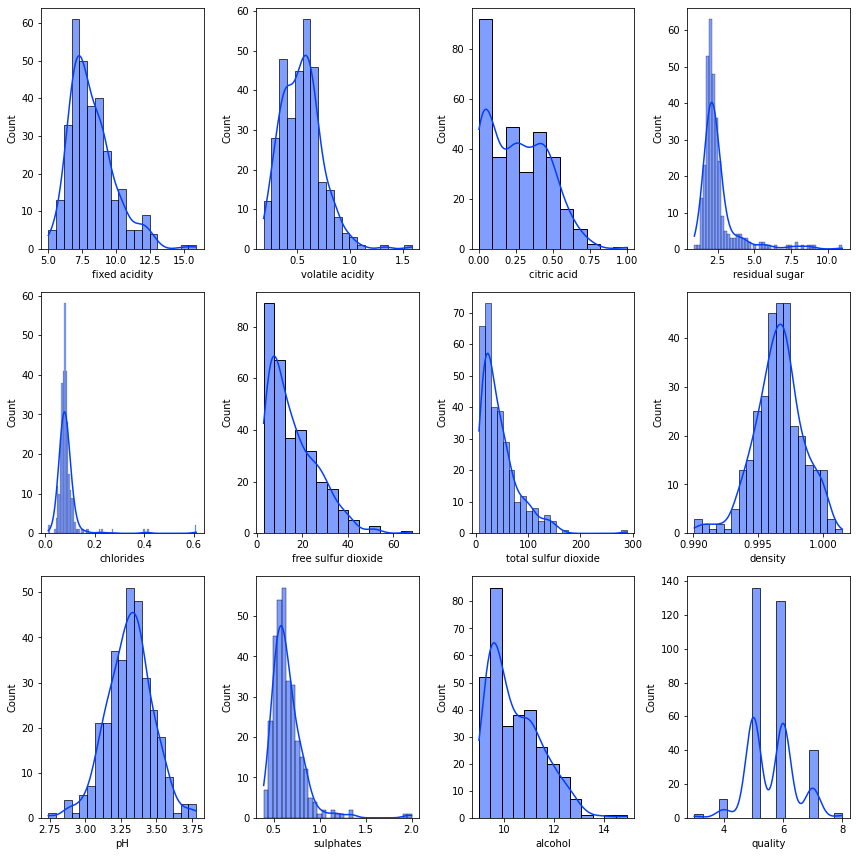

In [62]:
draw_feature_dist(pd.concat([X_test, y_test], axis=1))

### Correlation
- quality에 대하여 alcohol 변수가 가장 높은 correlation을 나타냄
- correlation +-0.1 미만의 변수 존재 (3개)
    - feature engineering / feature selection 등 적용 필요

In [23]:
def draw_corr_heatmap(corr):
    plt.subplots(figsize=(15,10))
    sns.set_palette("bright")
    sns.heatmap(corr, xticklabels=corr.columns,
                yticklabels=corr.columns,
                annot=True,
                cmap=sns.diverging_palette(220, 20, as_cmap=True))
    plt.show()

In [24]:
def draw_corr_heatmap(df):
    corr = df.corr()
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = 1
    sns.heatmap(corr, cmap='RdBu_r', annot=True, cbar=False, mask=mask)
    plt.show()

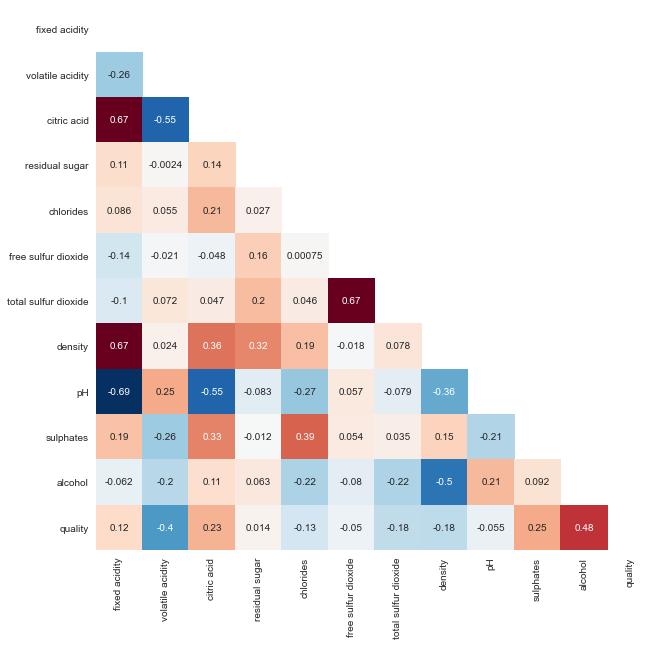

In [25]:
draw_corr_heatmap(red)

In [26]:
# TOP 5 Correlation vs. quality (absolute values)
corr_red = red.corr()
top5_corr_vs_quality = np.abs(corr_red['quality']).sort_values(ascending=False)[1:6]
top5_corr_vs_quality

alcohol             0.480343
volatile acidity    0.395214
sulphates           0.248835
citric acid         0.228057
density             0.184252
Name: quality, dtype: float64

In [27]:
# TOP 5 Correlation (vs. quality) Features - basic information
red[top5_corr_vs_quality.index.tolist() + ['quality']].groupby('quality').describe().T

quality                         3          4           5           6  \
alcohol          count  10.000000  53.000000  577.000000  535.000000   
                 mean    9.955000  10.265094    9.888562   10.658879   
                 std     0.818009   0.934776    0.749930    1.054933   
                 min     8.400000   9.000000    8.500000    8.400000   
                 25%     9.725000   9.600000    9.400000    9.800000   
                 50%     9.925000  10.000000    9.600000   10.500000   
                 75%    10.575000  11.000000   10.200000   11.400000   
                 max    11.000000  13.100000   14.900000   14.000000   
volatile acidity count  10.000000  53.000000  577.000000  535.000000   
                 mean    0.884500   0.693962    0.578596    0.496084   
                 std     0.331256   0.220110    0.170017    0.162925   
                 min     0.440000   0.230000    0.180000    0.160000   
                 25%     0.647500   0.530000    0.450000    0.380000   
                 50%     0.845000   0.670000    0.580000    0.490000   
                 75%     1.010000   0.870000    0.670000    0.600000   
                 max     1.580000   1.130000    1.330000    1.040000   
sulphates        count  10.000000  53.000000  577.000000  535.000000   
                 mean    0.570000   0.596415    0.623570    0.674542   
                 std     0.122020   0.239391    0.175856    0.154975   
                 min     0.400000   0.330000    0.370000    0.400000   
                 25%     0.512500   0.490000    0.530000    0.580000   
                 50%     0.545000   0.560000    0.580000    0.640000   
                 75%     0.615000   0.600000    0.660000    0.750000   
                 max     0.860000   2.000000    1.980000    1.950000   
citric acid      count  10.000000  53.000000  577.000000  535.000000   
                 mean    0.171000   0.174151    0.244523    0.279364   
                 std     0.250664   0.201030    0.181184    0.196238   
                 min     0.000000   0.000000    0.000000    0.000000   
                 25%     0.005000   0.030000    0.090000    0.100000   
                 50%     0.035000   0.090000    0.230000    0.270000   
                 75%     0.327500   0.270000    0.360000    0.440000   
                 max     0.660000   1.000000    0.790000    0.780000   
density          count  10.000000  53.000000  577.000000  535.000000   
                 mean    0.997464   0.996542    0.997082    0.996565   
                 std     0.002002   0.001575    0.001584    0.001968   
                 min     0.994710   0.993400    0.992560    0.990070   
                 25%     0.996150   0.995650    0.996160    0.995390   
                 50%     0.997565   0.996500    0.997000    0.996520   
                 75%     0.998770   0.997450    0.997900    0.997865   
                 max     1.000800   1.001000    1.003150    1.003690   

quality                          7          8  
alcohol          count  167.000000  17.000000  
                 mean    11.491118  12.158824  
                 std      0.970779   1.229867  
                 min      9.200000   9.800000  
                 25%     10.800000  11.400000  
                 50%     11.600000  12.500000  
                 75%     12.200000  12.900000  
                 max     14.000000  14.000000  
volatile acidity count  167.000000  17.000000  
                 mean     0.403653   0.427647  
                 std      0.141162   0.148178  
                 min      0.120000   0.260000  
                 25%      0.300000   0.330000  
                 50%      0.370000   0.380000  
                 75%      0.480000   0.490000  
                 max      0.915000   0.850000  
sulphates        count  167.000000  17.000000  
                 mean     0.742635   0.774706  
                 std      0.135656   0.115006  
                 min      0.390000   0.630000  
                 25%      0.650000   0.

### jointplot
- quality에 대하여 +0.4 이상의 correlation을 나타내는 alcohol 변수

> 결합플롯 시각화 결과, 각 quality value에 대응하는 alcohol 분포에 중첩성이 존재함을 확인

> 산점도(scatter plot)으로부터, 각 quality에 대한 변수의 분포에 outlier 존재함을 확인

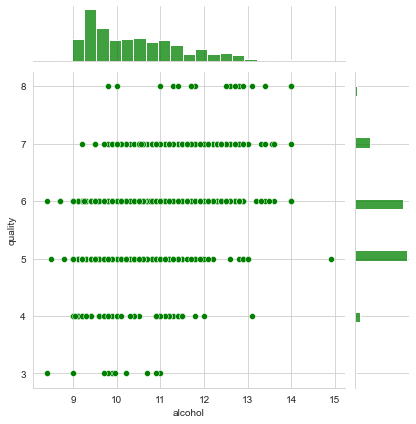

In [28]:
sns.jointplot(x='alcohol', y='quality', data=red, color='green')
plt.show()

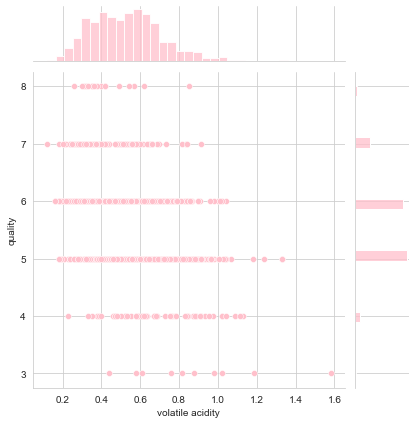

In [29]:
sns.jointplot(x='volatile acidity', y='quality', data=red, color='pink')
plt.show()

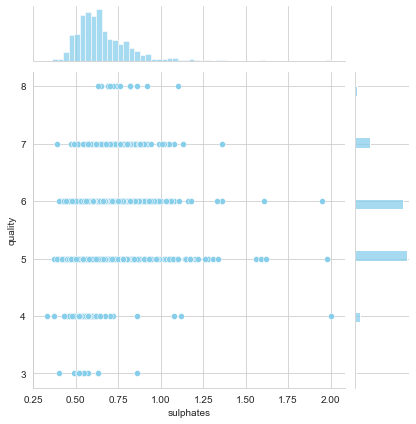

In [30]:
sns.jointplot(x='sulphates', y='quality', data=red, color='skyblue')
plt.show()

### Pairplots (`alcohol` - rest of top 5 features)
- 주요 변수를 2차원 공간에서 시각화했을 때에도 심하게 중첩된 모습을 확인
- 특히, 샘플 숫자가 적은 target(`quality`)에 해당하는 데이터는 크게 sparse한 경향을 보임

In [32]:
top5_corr_vs_quality

alcohol             0.480343
volatile acidity    0.395214
sulphates           0.248835
citric acid         0.228057
density             0.184252
Name: quality, dtype: float64

In [58]:
top5_corr_vs_quality_fnames = top5_corr_vs_quality.index.tolist()
top5_corr_vs_quality_fnames

['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'density']

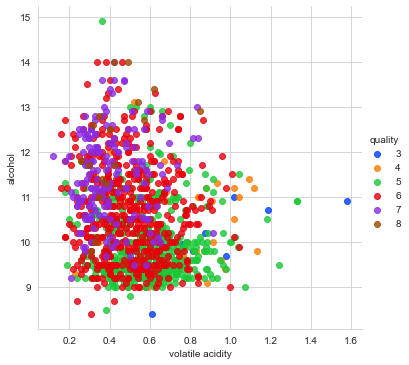

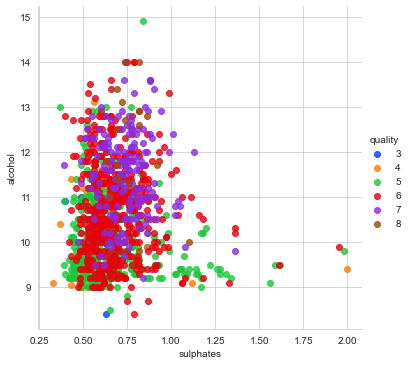

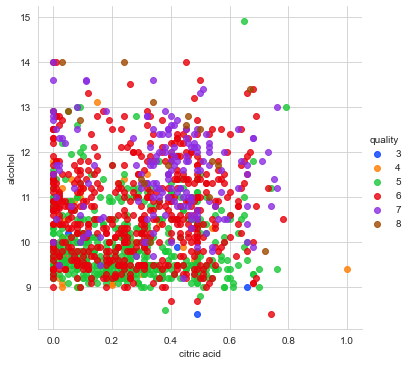

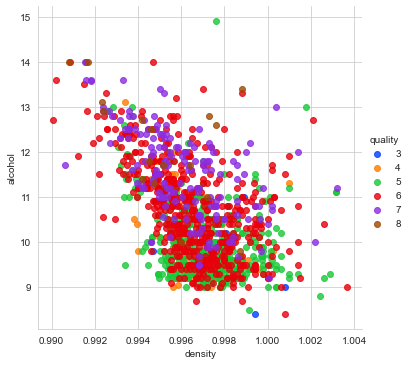

In [68]:
for i in range(1,5):
    sns.lmplot(x=top5_corr_vs_quality_fnames[i], y='alcohol', hue='quality', fit_reg=False, data=red)
plt.show()

### Pairplots (all features)
- 강한 비선형성이 나타남
    - 각 target label에 대응하는 변수 산점도가 서로 뒤엉켜 있는 모습
    - 고차원 공간에서 다변수를 효과적으로 분리하는 방법론을 다양하게 적용해 볼 필요성 존재
        - Random Feature Generation
        - Feature Selection
        - Dimension Reduction
        - Outlier Removal
        - SVM / Neural Network 등 비선형 패턴 파악에 효과적인 Regression Model

<br>

### Linear Regression vs. Boosting-based Regression
> 계산비용이 낮은 기본 선형회귀 모델에 대해서는 연산량이 많은 전처리 방법론 다양하게 실험

> 계산비용이 높은 부스팅 모델의 경우 스케일링 수준에서만 전처리한 뒤 모델 하이퍼파라미터 튜닝 진행

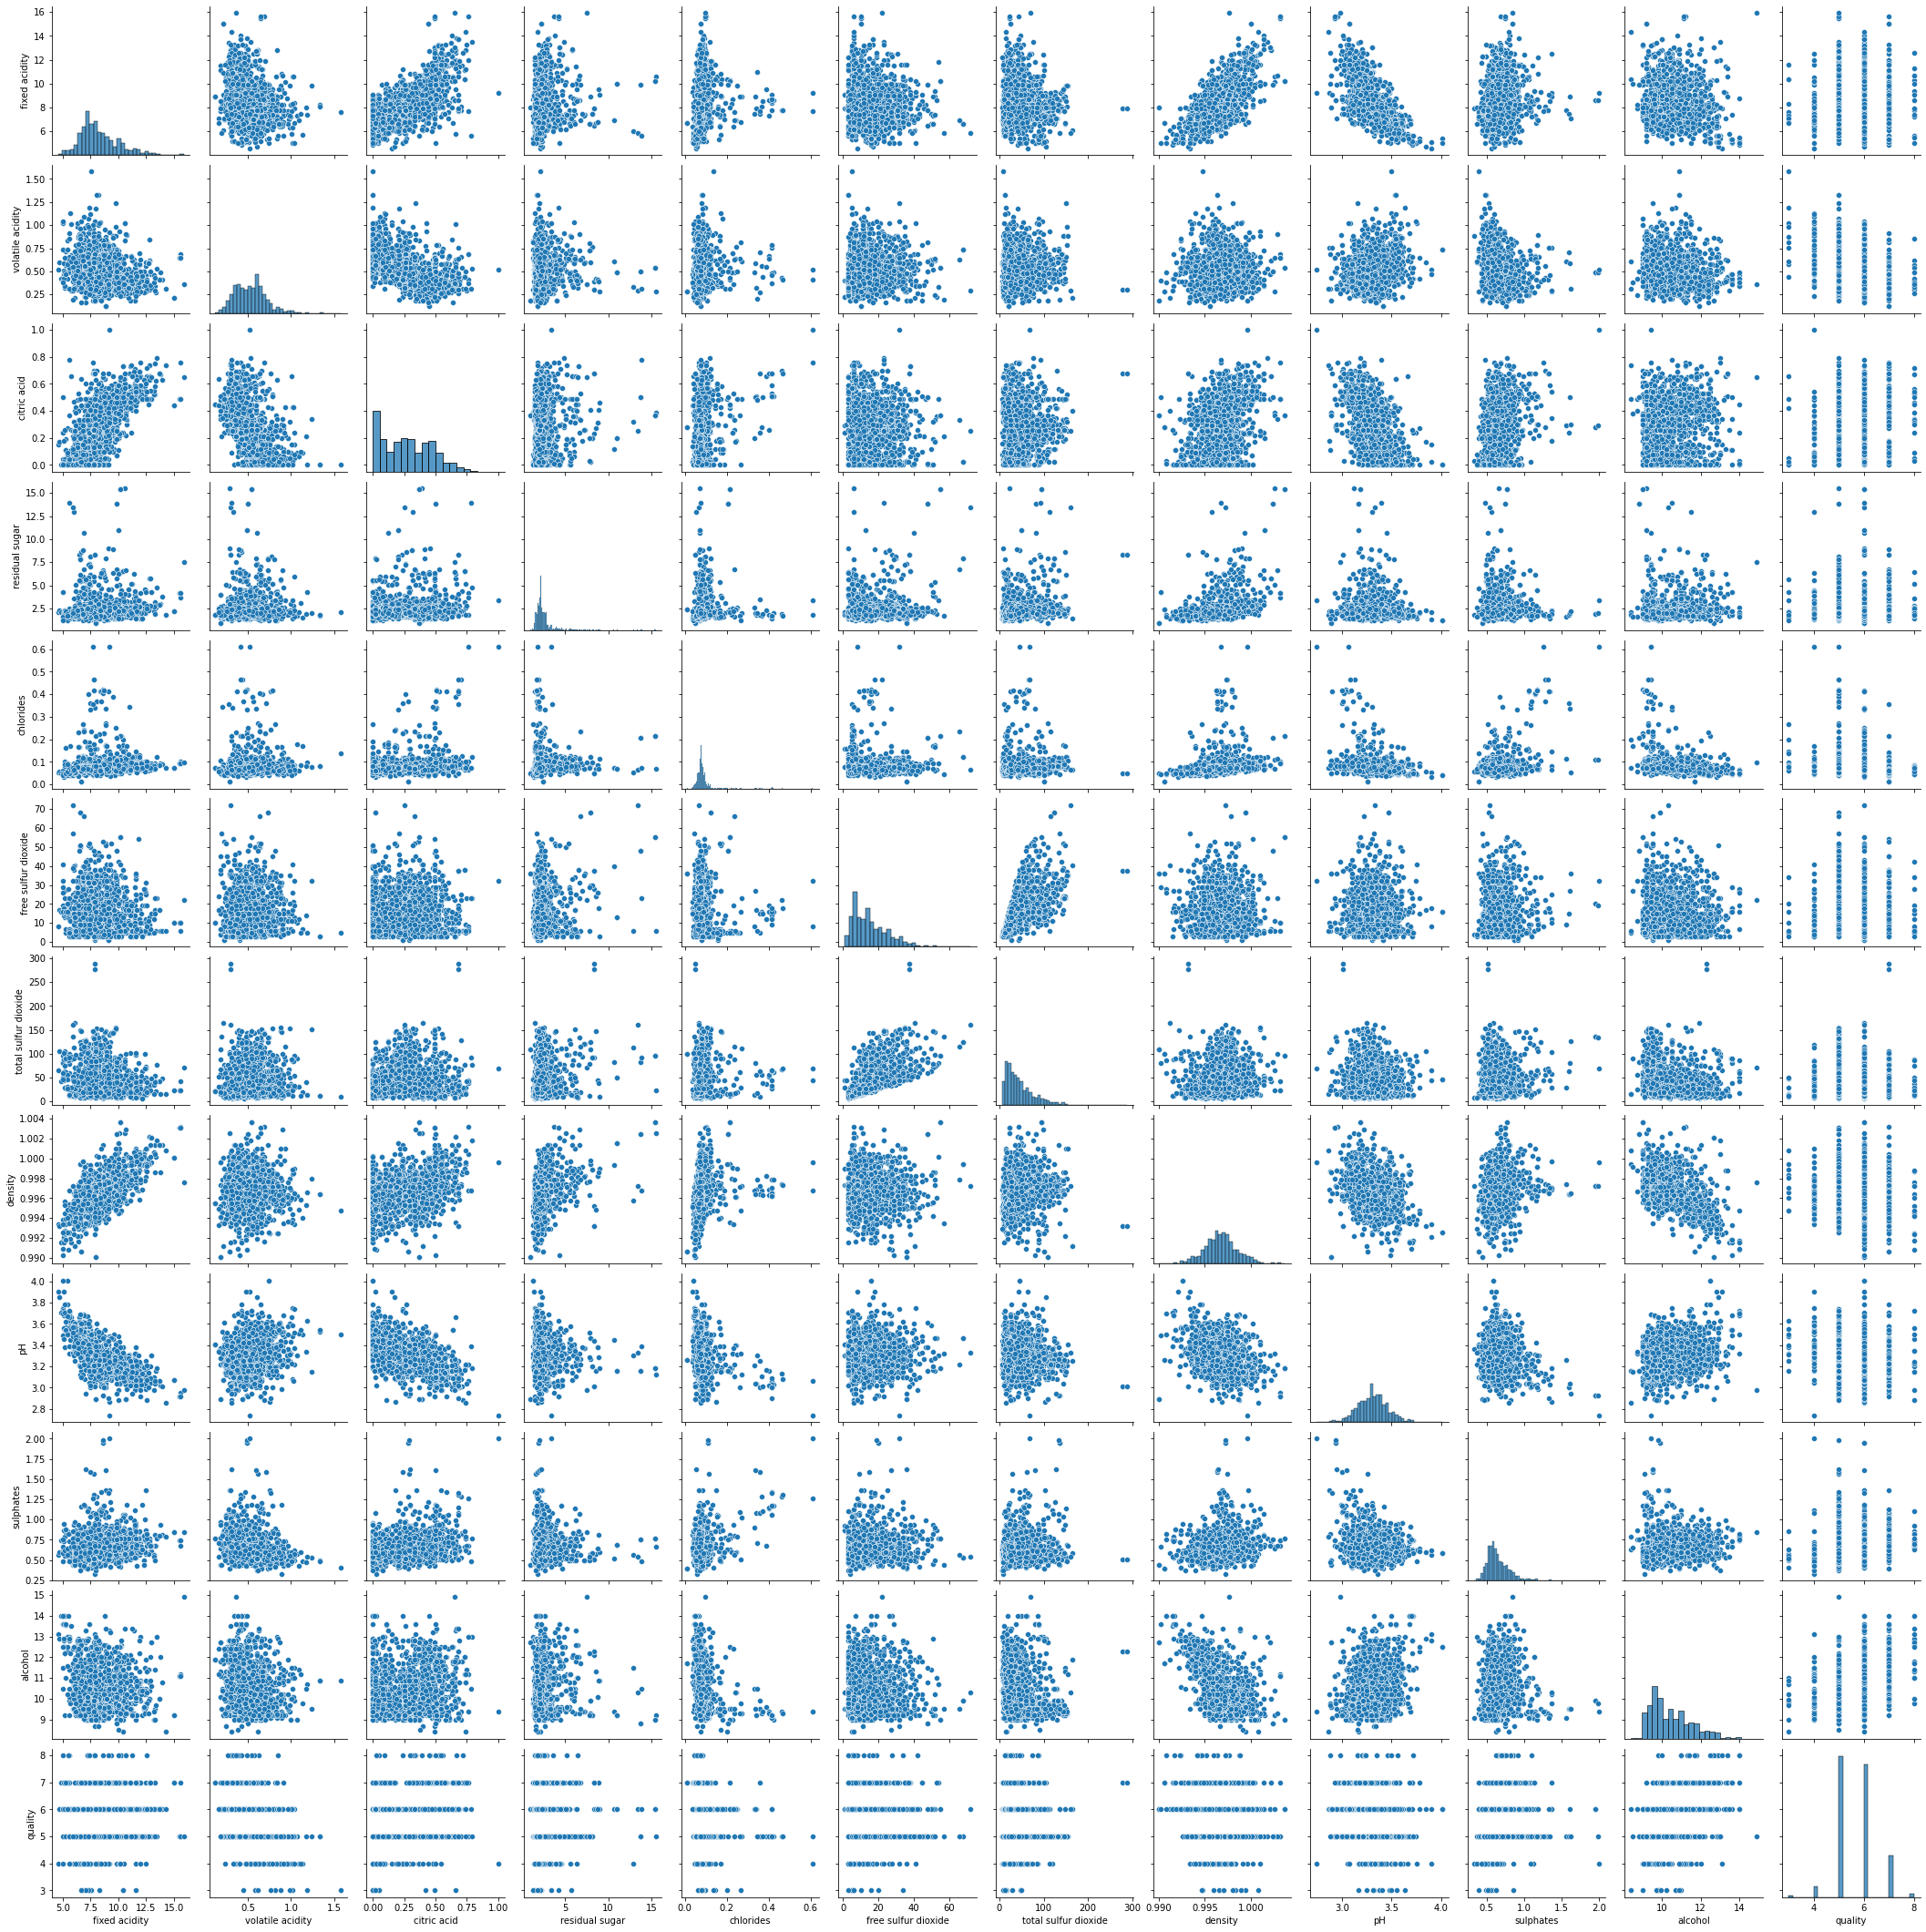

In [43]:
sns.pairplot(red)

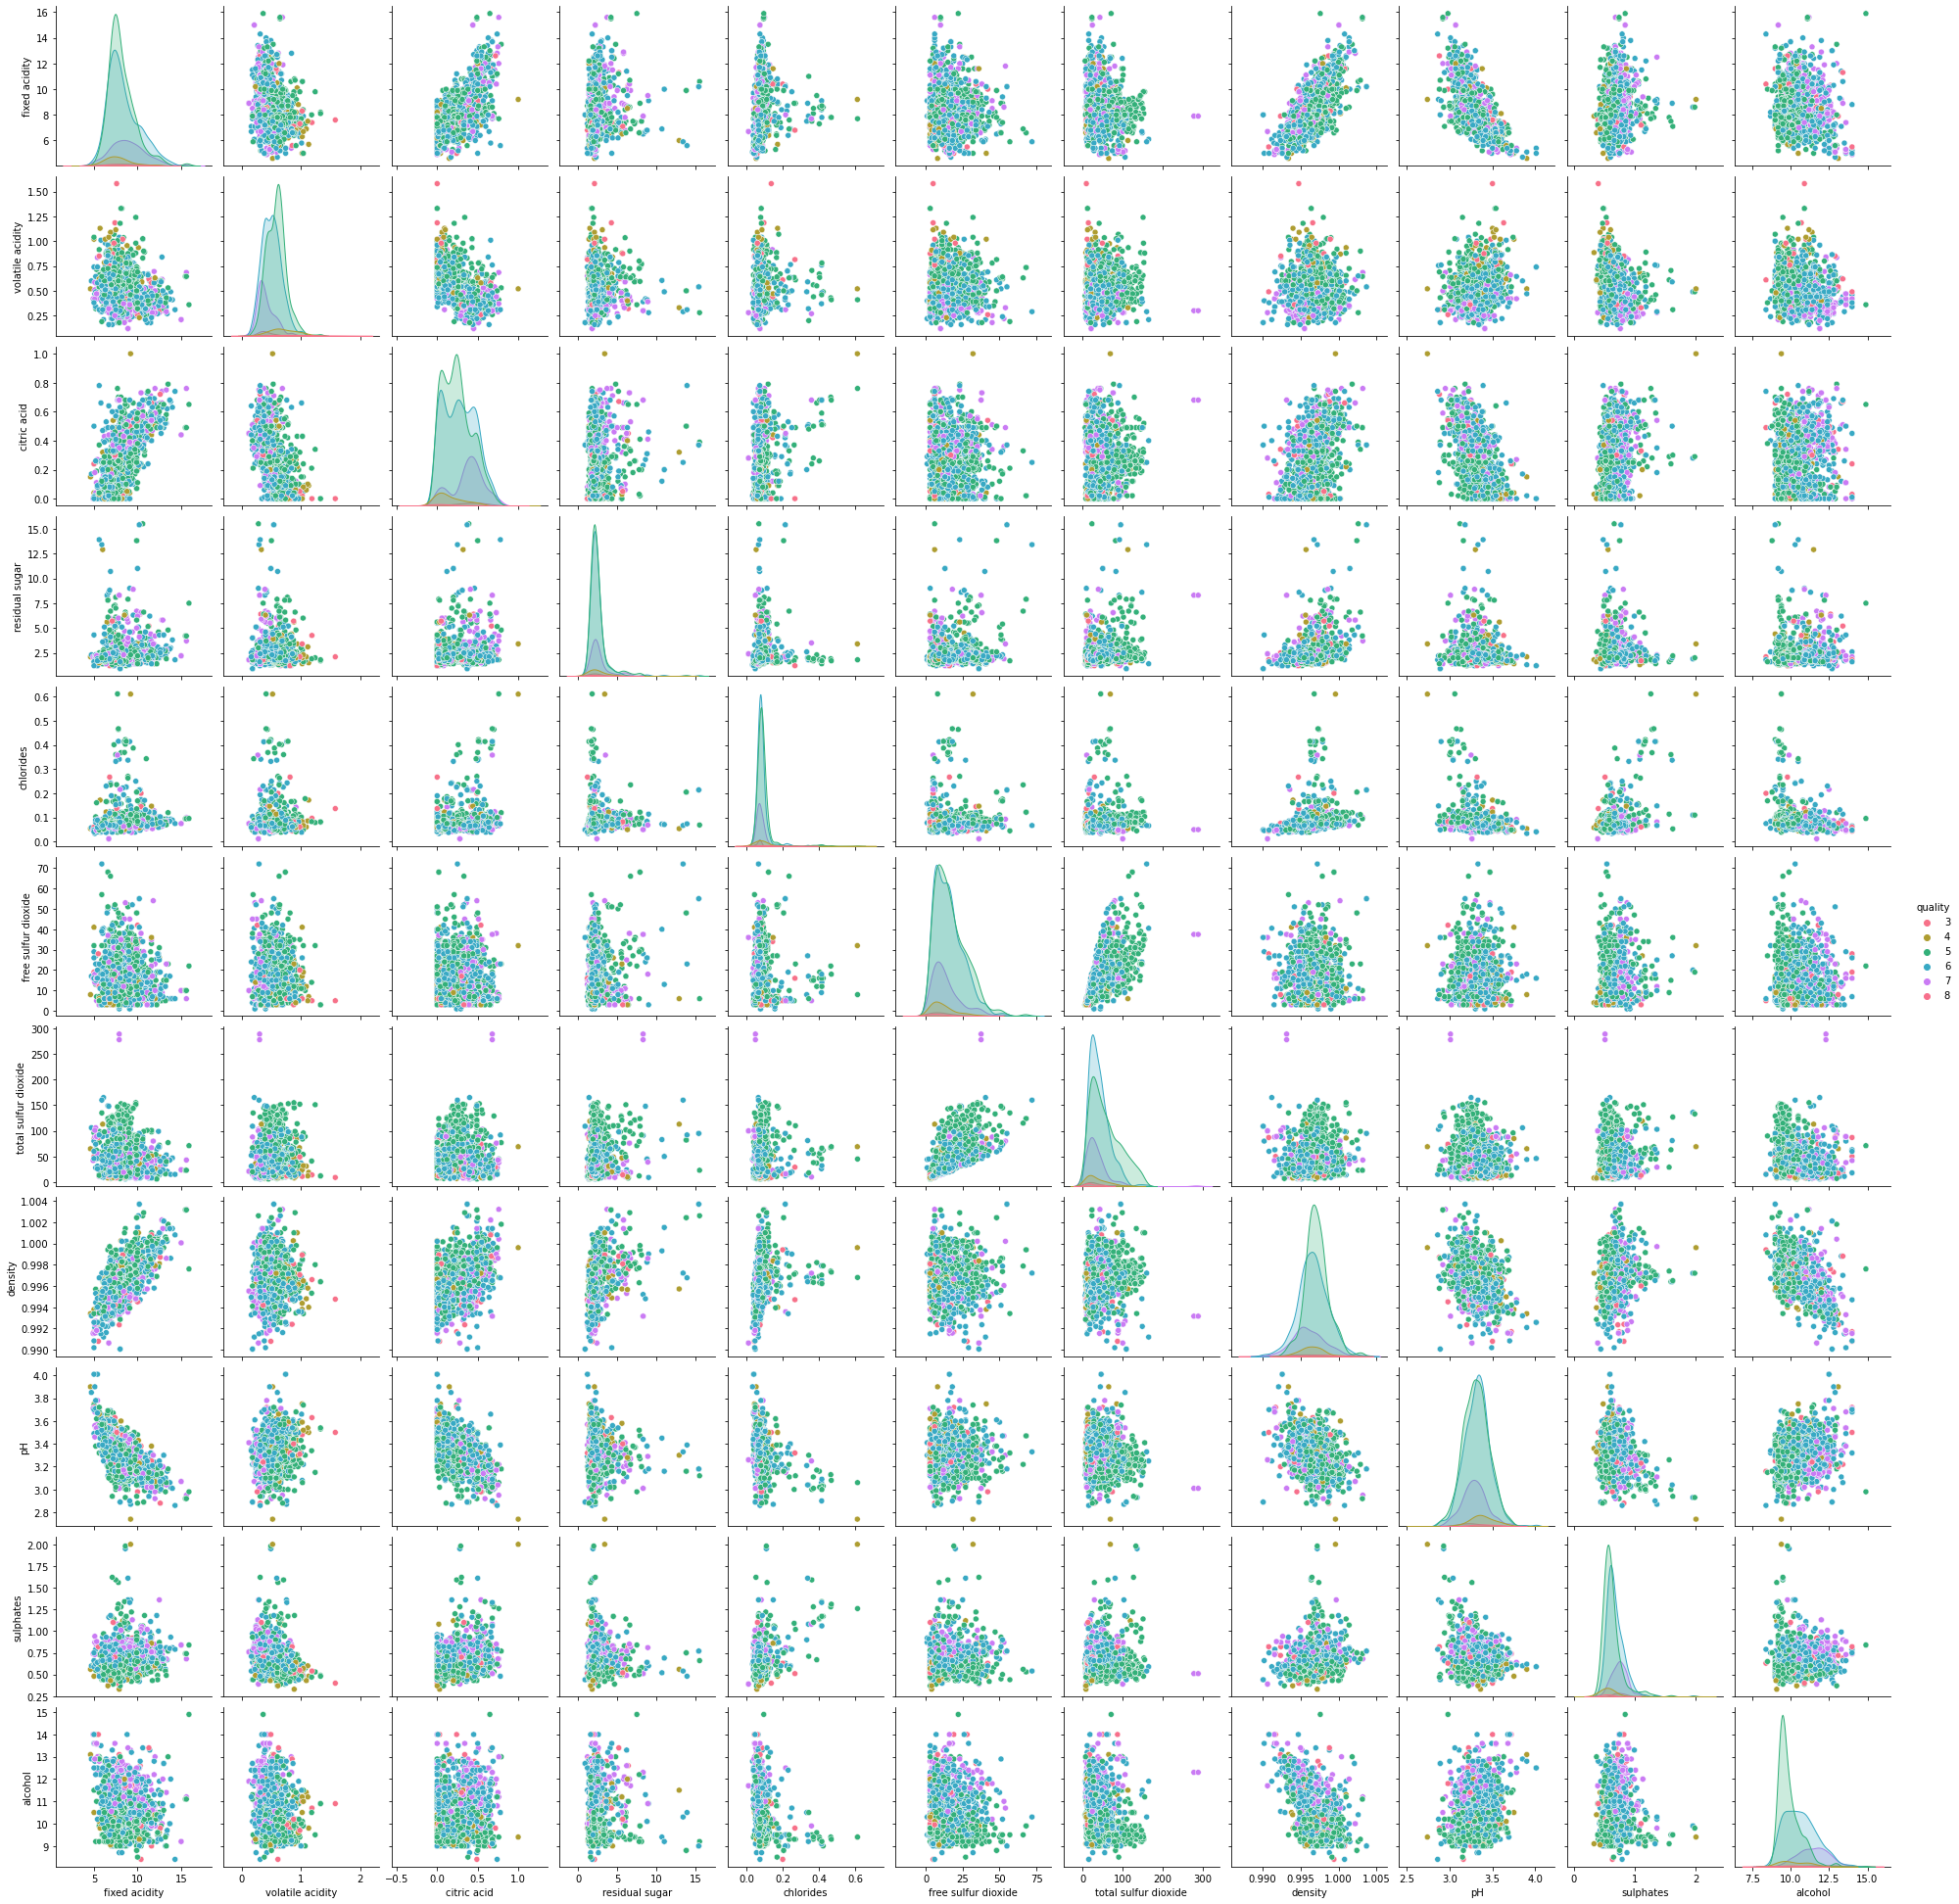

In [47]:
sns.pairplot(red, hue='quality', palette='husl')

### 스케일러 적용에 따른 박스플롯 시각화

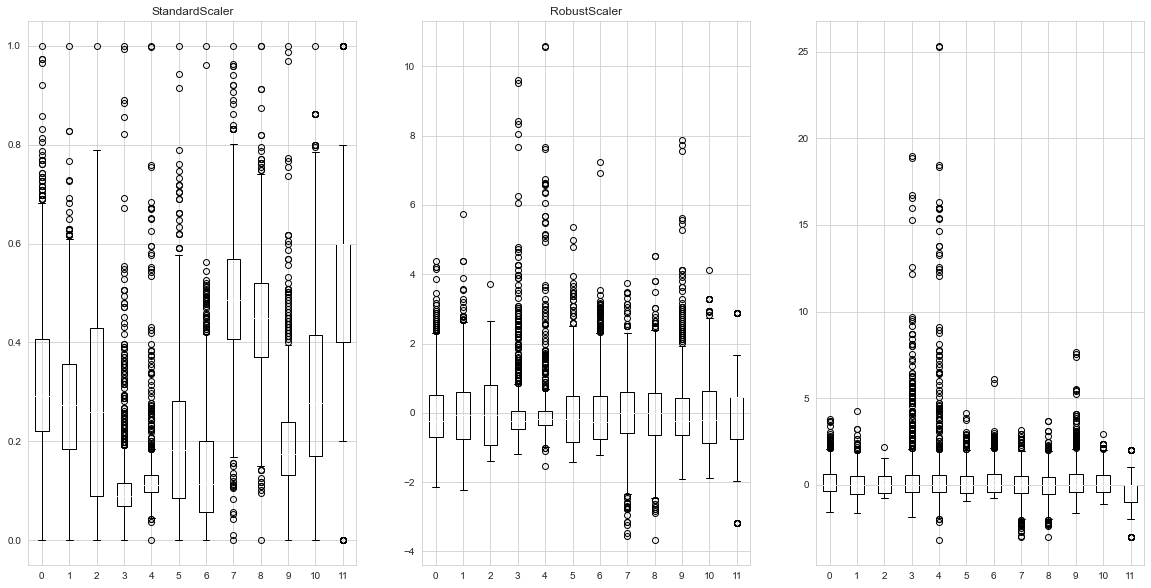

In [69]:
plt.figure(figsize=(20,10))
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
scaler_names = ['MinMaxScaler', 'StandardScaler', 'RobustScaler']
for i in range(1, 4):
    plt.title(scaler_names[i-1])
    plt.subplot(1,3,i)
    pd.DataFrame(scalers[i-1].fit_transform(red)).boxplot()
plt.show()